In [ ]:
#!pip install tensorflow

In [ ]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

## **Load Dataset**

In [ ]:
data = tf.keras.datasets.mnist

In [ ]:
(x_train, y_train), (x_test, y_test) = data.load_data()

In [ ]:
print('x_train shape', x_train.shape)
print('y_train shape', y_train.shape)

x_train shape (60000, 28, 28)
y_train shape (60000,)


In [ ]:
print('x_test shape', x_test.shape)
print('y_test shape', y_test.shape)

x_test shape (10000, 28, 28)
y_test shape (10000,)


6


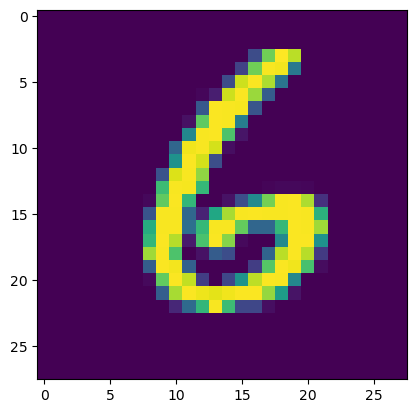

In [ ]:
#visualize image
plt.imshow(x_train[6000])
print(y_train[6000])

## **Scale Images**

In [ ]:
# image ---> RGB
# Red ---> (255, 0, 0)
# Green ---> (0, 255, 0)
# Blue ----> (0, 0, 255)
#scale image ---> 0:1 ---> divide image by 255

In [ ]:
x_train = x_train / 255
x_test = x_test / 255

In [ ]:
x_train[100]

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

## **Build Model**

In [ ]:
from tensorflow.keras import Sequential

In [ ]:
model = Sequential()
# input layer ---> hidden layer ---> hidden layer ---> output layer

In [ ]:
#input layer ----> Flattenlayer
model.add(tf.keras.layers.Flatten(input_shape = (28, 28)))

#hiddenn layer ---> Dense
model.add(tf.keras.layers.Dense(128, activation = tf.keras.activations.relu))

#hiddenn layer ---> Dense
model.add(tf.keras.layers.Dense(128, activation = tf.keras.activations.relu))

#output layer ---> Dense(n classes, softmax ---> multiclass classification)
model.add(tf.keras.layers.Dense(10, activation = tf.keras.activations.softmax))

In [ ]:
#model compile
model.compile(optimizer = 'adam',
             loss = 'sparse_categorical_crossentropy',
             metrics = ['accuracy'])

In [ ]:
#model fit
model.fit(x_train, y_train, epochs = 5)

Epoch 1/5
1875/1875 [==============================] - 10s 5ms/step - loss: 0.2328 - accuracy: 0.9309
Epoch 2/5
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0975 - accuracy: 0.9701
Epoch 3/5
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0680 - accuracy: 0.9779
Epoch 4/5
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0511 - accuracy: 0.9833
Epoch 5/5
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0418 - accuracy: 0.9861


In [ ]:
#model evaluation
test_loss, test_accuracy = model.evaluate(x_test, y_test)

313/313 [==============================] - 1s 3ms/step - loss: 0.0780 - accuracy: 0.9777


In [1]:
model.save('minst_model.h5')